# Hypothesis Testing: Data Science salary comparision in different place.

## Section 1. Introduction

Focusing on comparing whether there is a difference data science job's salary in Europe and North America.

## Section 2. Preliminary Results

In [7]:
# load necessary packages
library(infer)
library(tidyverse)
library(cowplot)

In [8]:
raw_salary <- read.csv("https://raw.githubusercontent.com/YuluDuan/Hypothesis-Testing-New-York-City-Airbnb-booking-Prices/main/ds_salaries.csv")

head(raw_salary)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In this project, as we would focus on analyzing the salary in both Europe and North America, it is important to first filter out all the data that belongs to that two countries and select the necessary column (i.e. location and salary_in_usd).

In [9]:
# by checking all the countries in this list, first find out the countries that belongs to Europe and North America.

na <- c("US", "MX","CA")
eur <- c("DE", "GB", "HU", "FR", "GR", "NL", "AT", "ES", "PT", "DK", "IT", "HR", "LU"
         ,"PL", "RO", "BE", "UA", "RU", "MT", "MD", "SI", "CH", "CZ", "EE", "IE")

In [10]:
# fliter out all rows belong to Europe and North America, save them to a new column called "location"

ds_salary <- raw_salary %>%
    filter(company_location %in% append(na, eur)) %>%
    mutate(location = "North America")

ds_salary$location[ds_salary$company_location %in% eur] <- "Europe"

ds_salary$location <- as.factor(ds_salary$location)

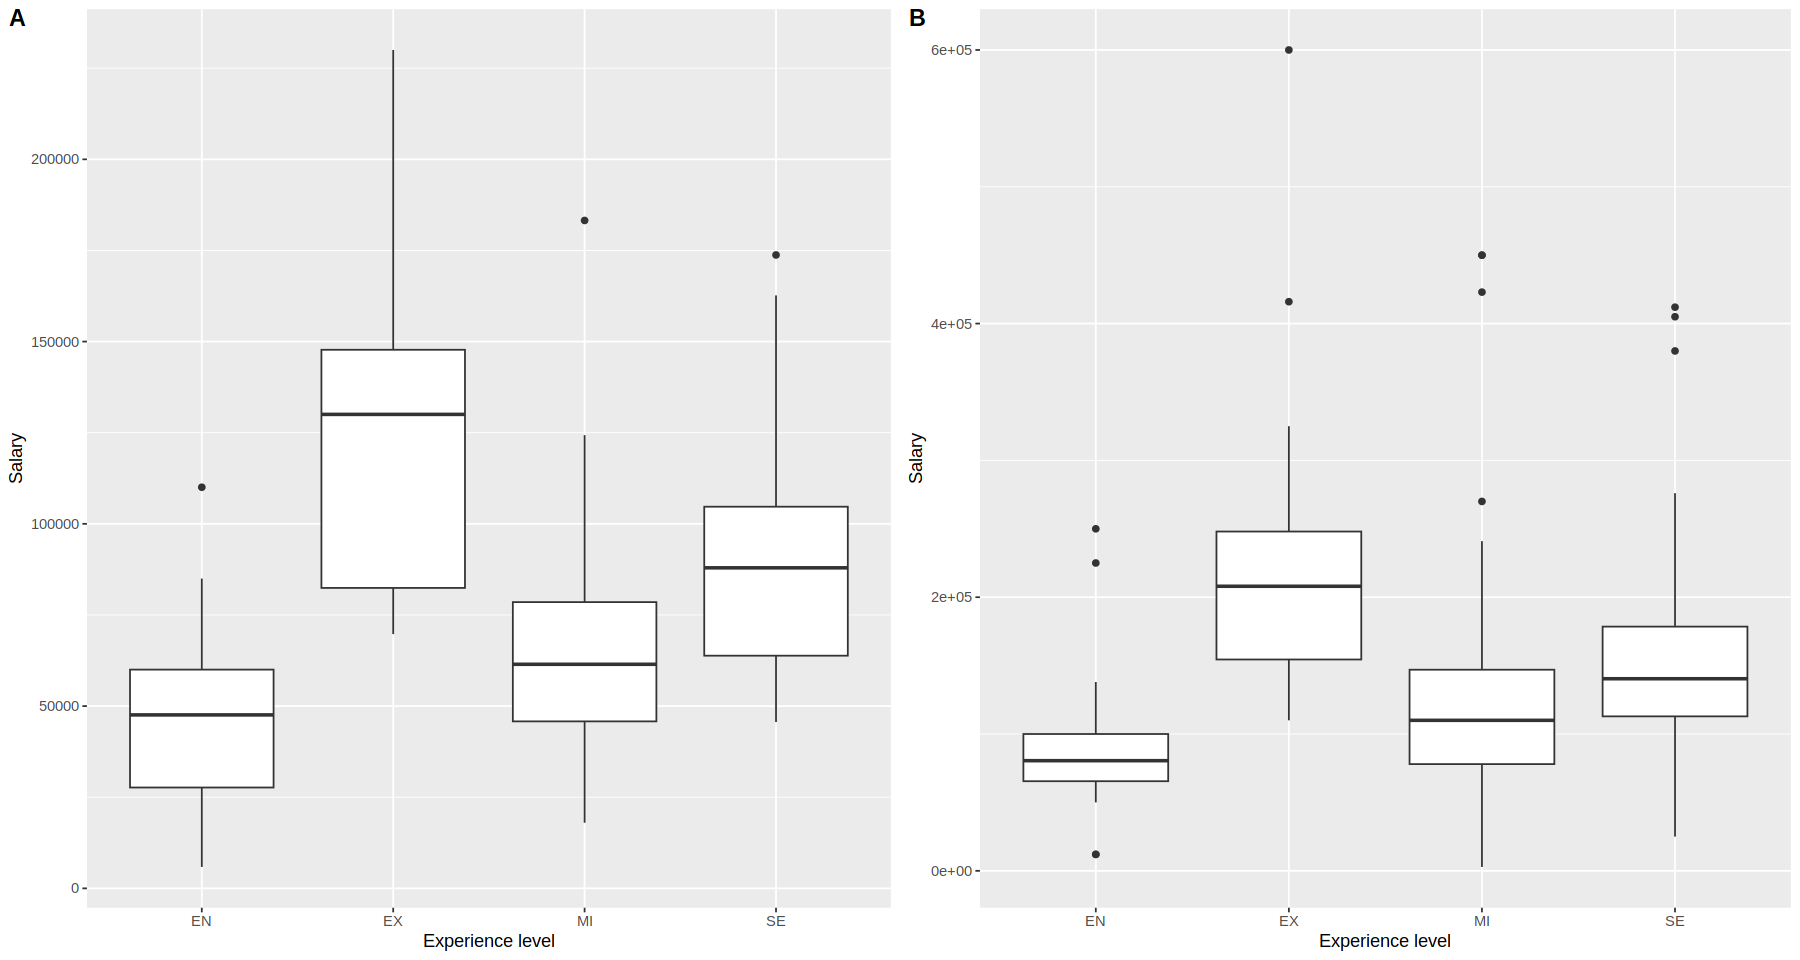

In [18]:
options(repr.plot.width=15, repr.plot.height=8)
eur_data <- ds_salary[ds_salary$location == "Europe", ]
na_data <- ds_salary[ds_salary$location == "North America",]

plot_a <- ggplot(eur_data, aes(x=experience_level, y= salary_in_usd)) + 
      geom_boxplot() +
      xlab("Experience level") +
      ylab("Salary")

plot_b <- ggplot(na_data, aes(x=experience_level, y= salary_in_usd)) + 
      geom_boxplot() +
      xlab("Experience level") +
      ylab("Salary") 
        
plot_grid(plot_a, plot_b, labels = "AUTO")

Looking at other factors in our dataset, we think the experience_level might be one factor that would influence the salary. By looking at the salary, we can see that the "EX" group deviates a lot from the other three groups. Hence, to control the influence of experience_level in our analysis, we decided to use data from experience_level of "EN", "MI" and "SE".

In [19]:
ds_final <- ds_salary %>%
    filter(experience_level != "EX") %>%
    select(salary_in_usd, location)
summary(ds_final$location)
head(ds_final)

Europe North America 
          150           370

,salary_in_usd,location
,<int>,<fct>
1,79833,Europe
2,109024,Europe
3,150000,North America
4,72000,North America
5,190000,North America
6,35735,Europe


Here, we get our final dataset that would be used to data analysis, and we would now draw some **plots** to do some explanatory analysis.

The first sets of plots would be histograms, which would help us to learn more about the distribution of data we have. 

* Figure 1: Histogram of Salary in Europe

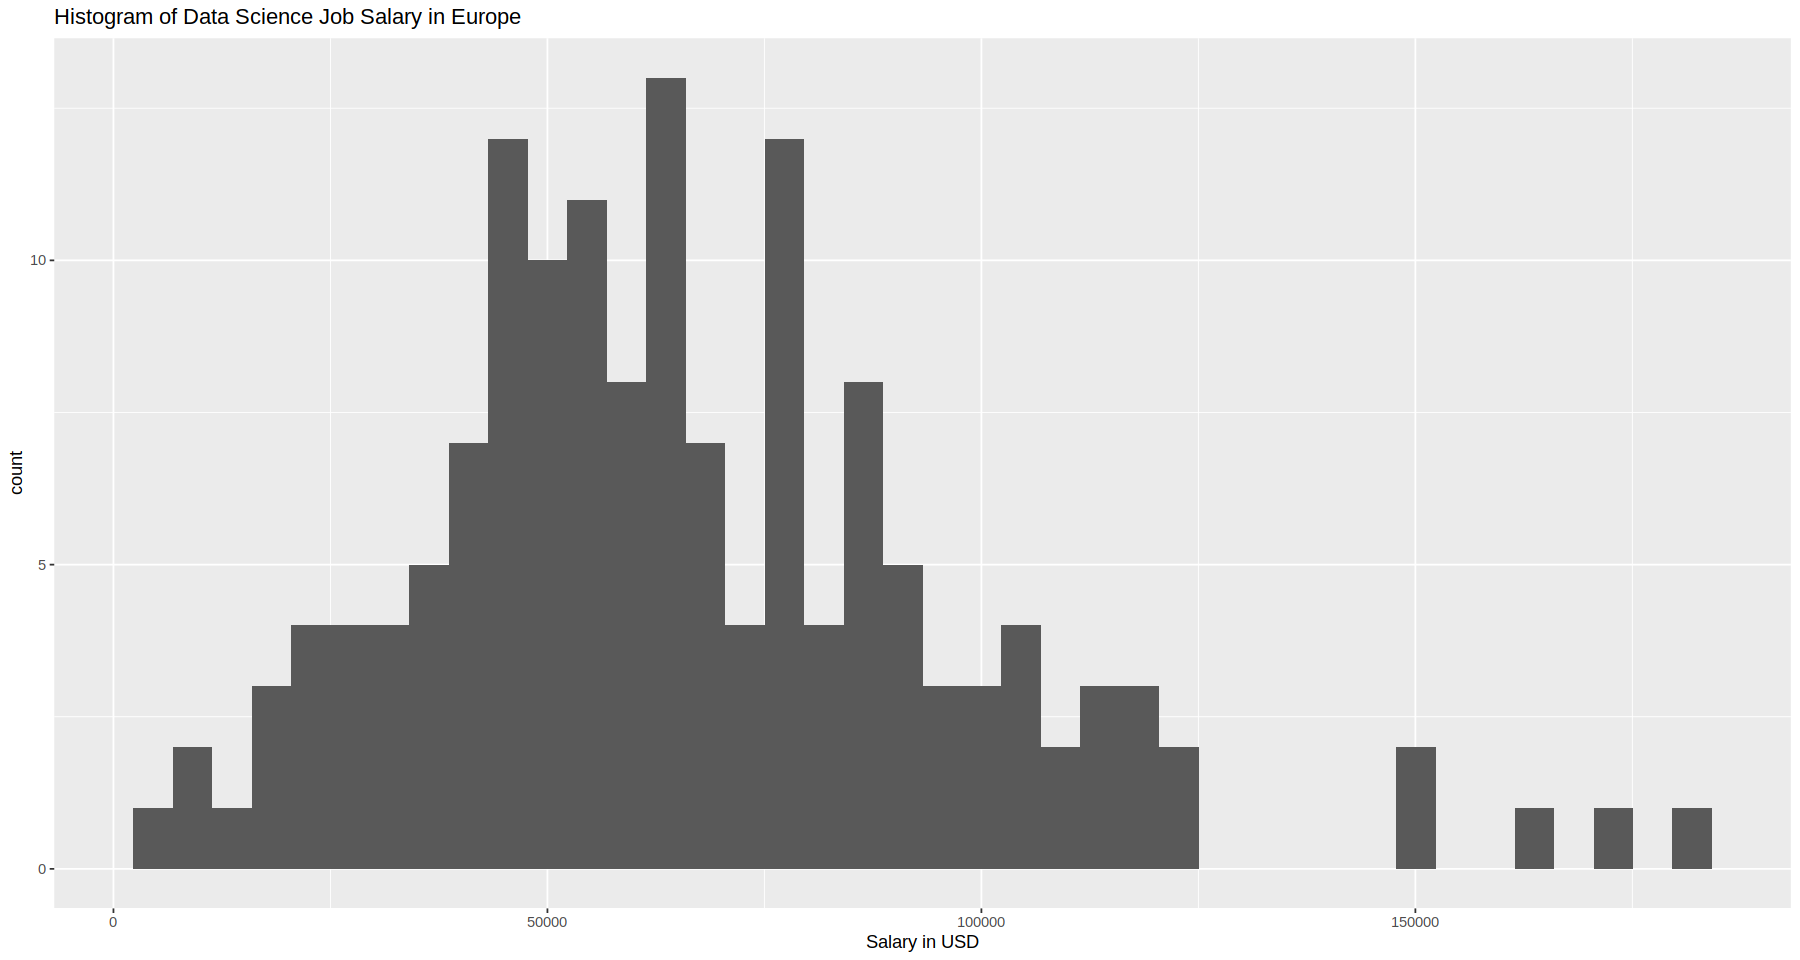

In [32]:
histogram_europe <- ds_final %>%
    filter(location == "Europe") %>%
    ggplot(aes(x = salary_in_usd)) +
    geom_histogram(bins = 40) +
    xlab("Salary in USD") + 
    ggtitle("Histogram of Data Science Job Salary in Europe")
histogram_europe

* Figure 2: Histogram of Salary in North America

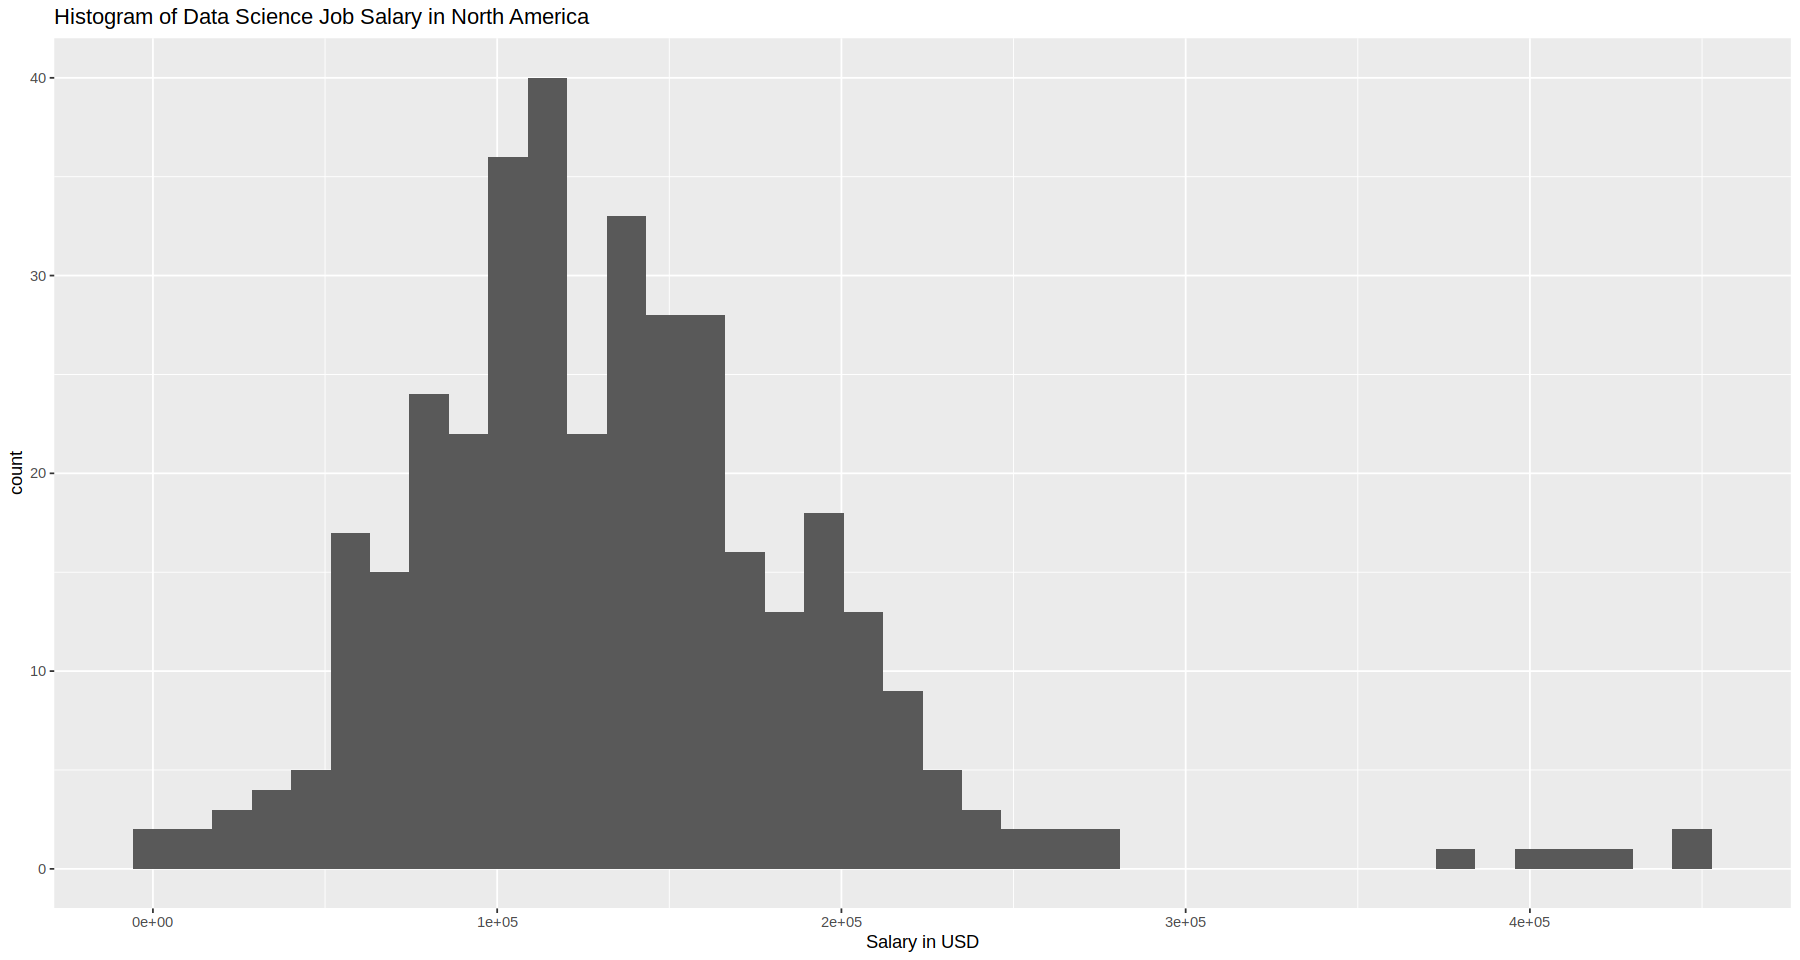

In [33]:
histogram_na <- ds_final %>%
    filter(location == "North America") %>%
    ggplot(aes(x = salary_in_usd)) +
    geom_histogram(bins = 40) +
    xlab("Salary in USD") + 
    ggtitle("Histogram of Data Science Job Salary in North America")
histogram_na

Now, we would get the estimate of the two parameters, which are population mean salary for data science job in Europe($\mu_e$) and population mean salary for data science job in North America($\mu_{na}$).

* Figure 3: Table of our estimate of true parameters

In [36]:
esti_mu_na <- ds_final %>%
    group_by(location) %>%
    summarize(mean_salary = mean(salary_in_usd))
esti_mu_na

location,mean_salary
<fct>,<dbl>
Europe,66661.01
North America,135177.46


For hypothesis testing, solely looking at the mean is not enough as there is also variability in our data. Hence, it would be helpful to pay attention to the sample variance, which we can compare by side-by-side boxplot.

* Figure 4: Boxplot of the salaries in two different regions

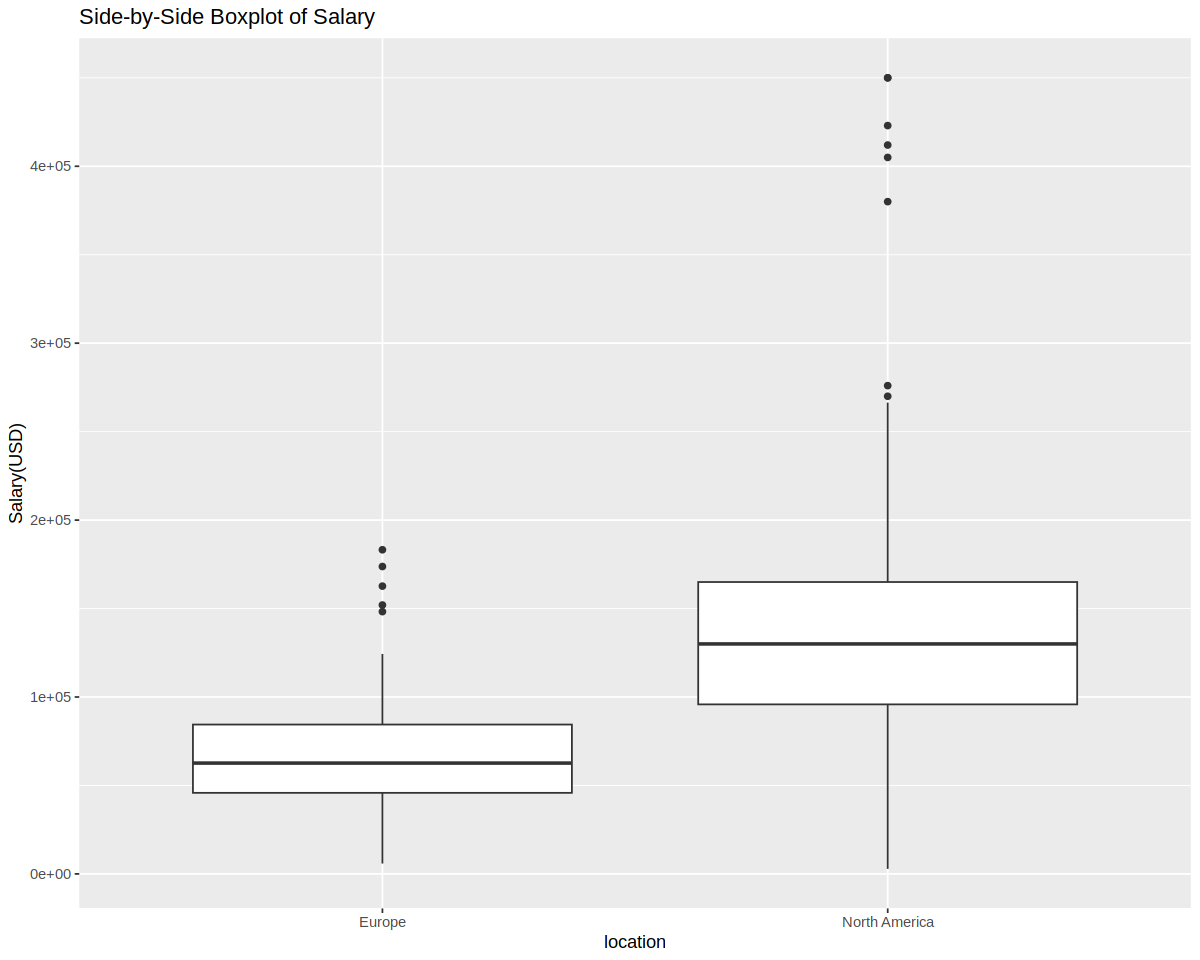

In [44]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot_ds <- ggplot(ds_final, aes(x = location, y = salary_in_usd)) +
    geom_boxplot() +
    ylab("Salary(USD)") +
    ggtitle("Side-by-Side Boxplot of Salary")
    
boxplot_ds

## Section 3. Methods: Plan